# Project 6: Bank Churn Prediction (Intoroduction to Neural Networks)
### Background: 
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

### Objective:  
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

### Attribute Information 
**RowNumber:** Row number.  
**CustomerId:** Unique identification key for different customers
**Surname:** Surname of the customer  
**CreditScore:** Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.  
**Geography:** The country to which the customer belongs.  
**Gender:** The gender of the customer  
**Age:**  Age of the customer.  
**Tenure:** The period of time a customer has been associated with the bank.  
**Balance:** The account balance (the amount of money deposited in the bank account) of the customer.  
**NumOfProducts:** How many acounts, bank account affiliated products the person has.  
**HasCrCard:** Does the customer have a credit card through the bank?  
**IsActiveMember:** Subjective, 1 if is active member 0 if not considered active.  
**EstimatedSalary:** Estimated salary of the customer.  
**Exited:** Did they leave the bank after all? 1 if they left, 0 if they stayed. This is our target variable.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# importing data
df = pd.read_csv('bank.csv')

## Overview of Data

In [4]:
df.shape

(10000, 14)

In [5]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Insight:** There are no null or missing data values in our dataframe that we need to deal with.

In [7]:
# Remove RowNuber, CustomerId and Surname columns from dataframe
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Analysis

In [9]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [10]:
df.duplicated().sum()

0

**Insight:** There are no duplicated rows of data in this dataframe.

In [11]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

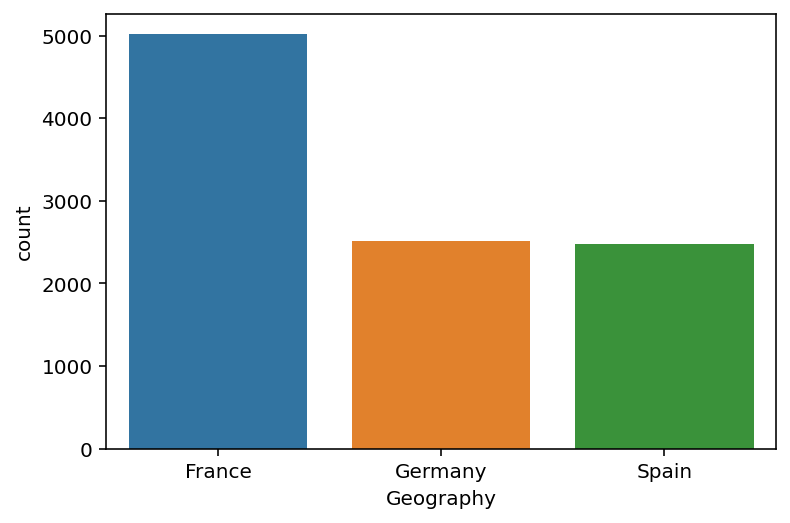

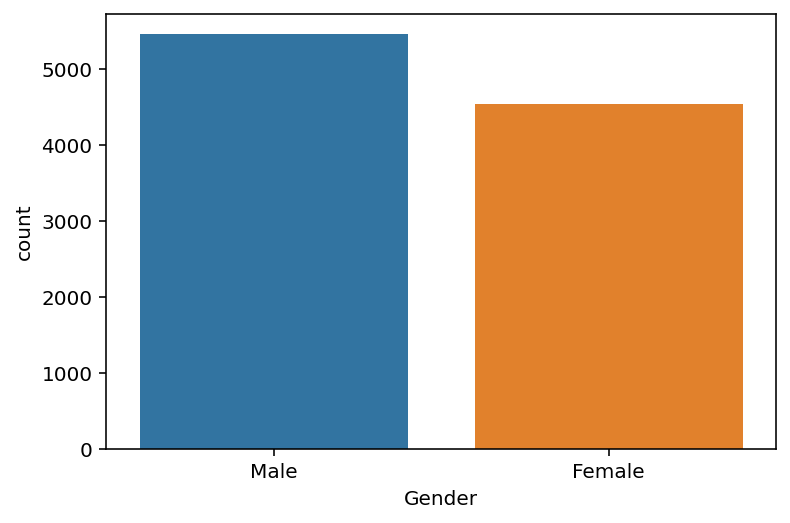

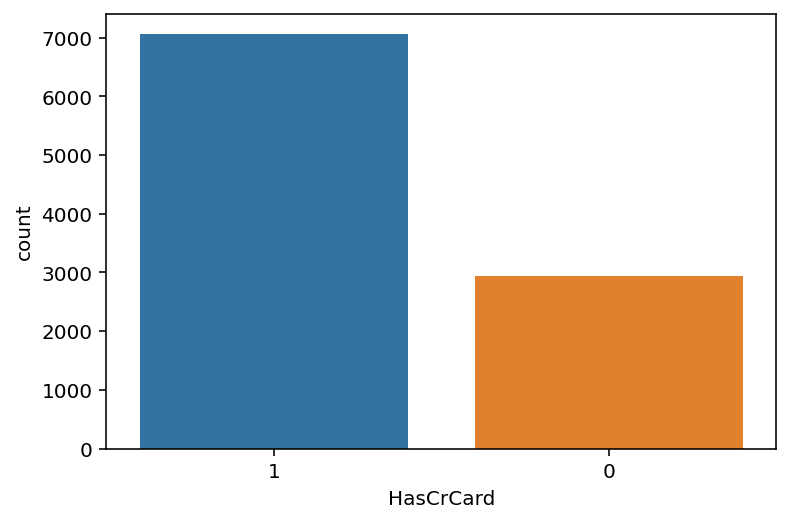

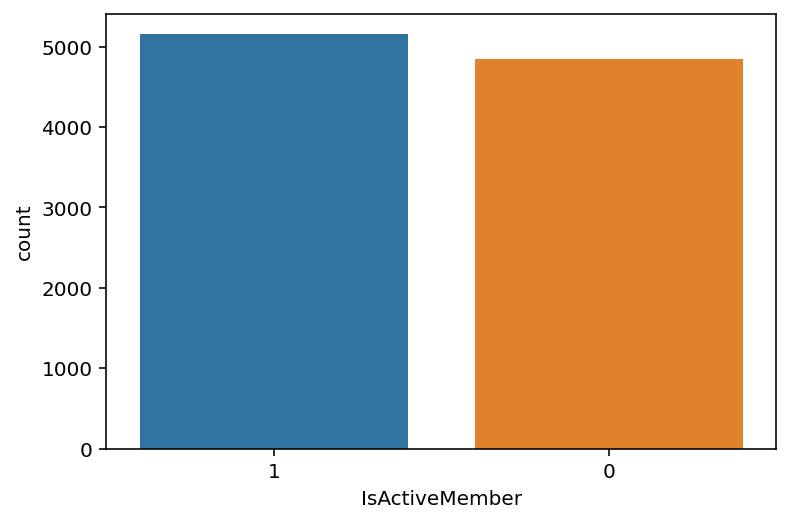

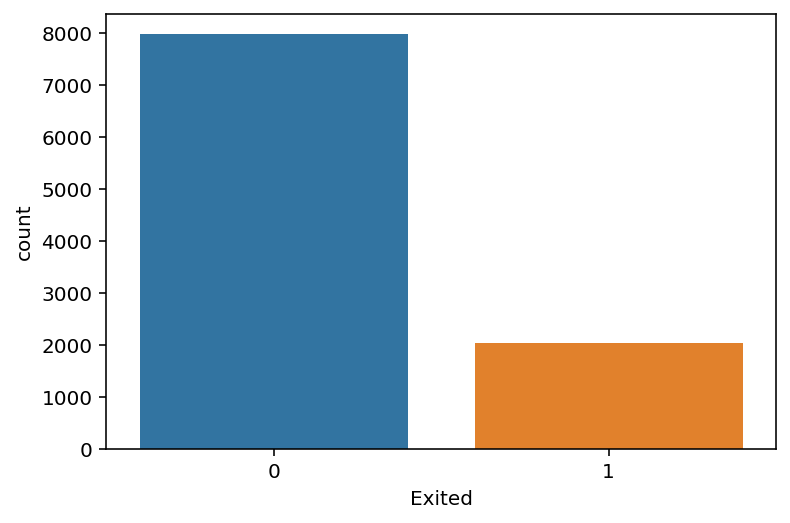

In [13]:
for i in ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']:
    sns.countplot(x = df[i], order = df[i].value_counts().index)
    plt.show()

In [14]:
for i in ['Geography', 'HasCrCard', 'Exited']:
    print(df[i].value_counts(normalize=True)*100)

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64
1    70.55
0    29.45
Name: HasCrCard, dtype: float64
0    79.63
1    20.37
Name: Exited, dtype: float64


**Insights:**  
`We can see from the above analysis that Age, HasCrCard, and our target variable 'Exited' are all skewed. Where Exited has 79.63% of customers not exiting versus 20.37% who are exiting (aka churn rate)`

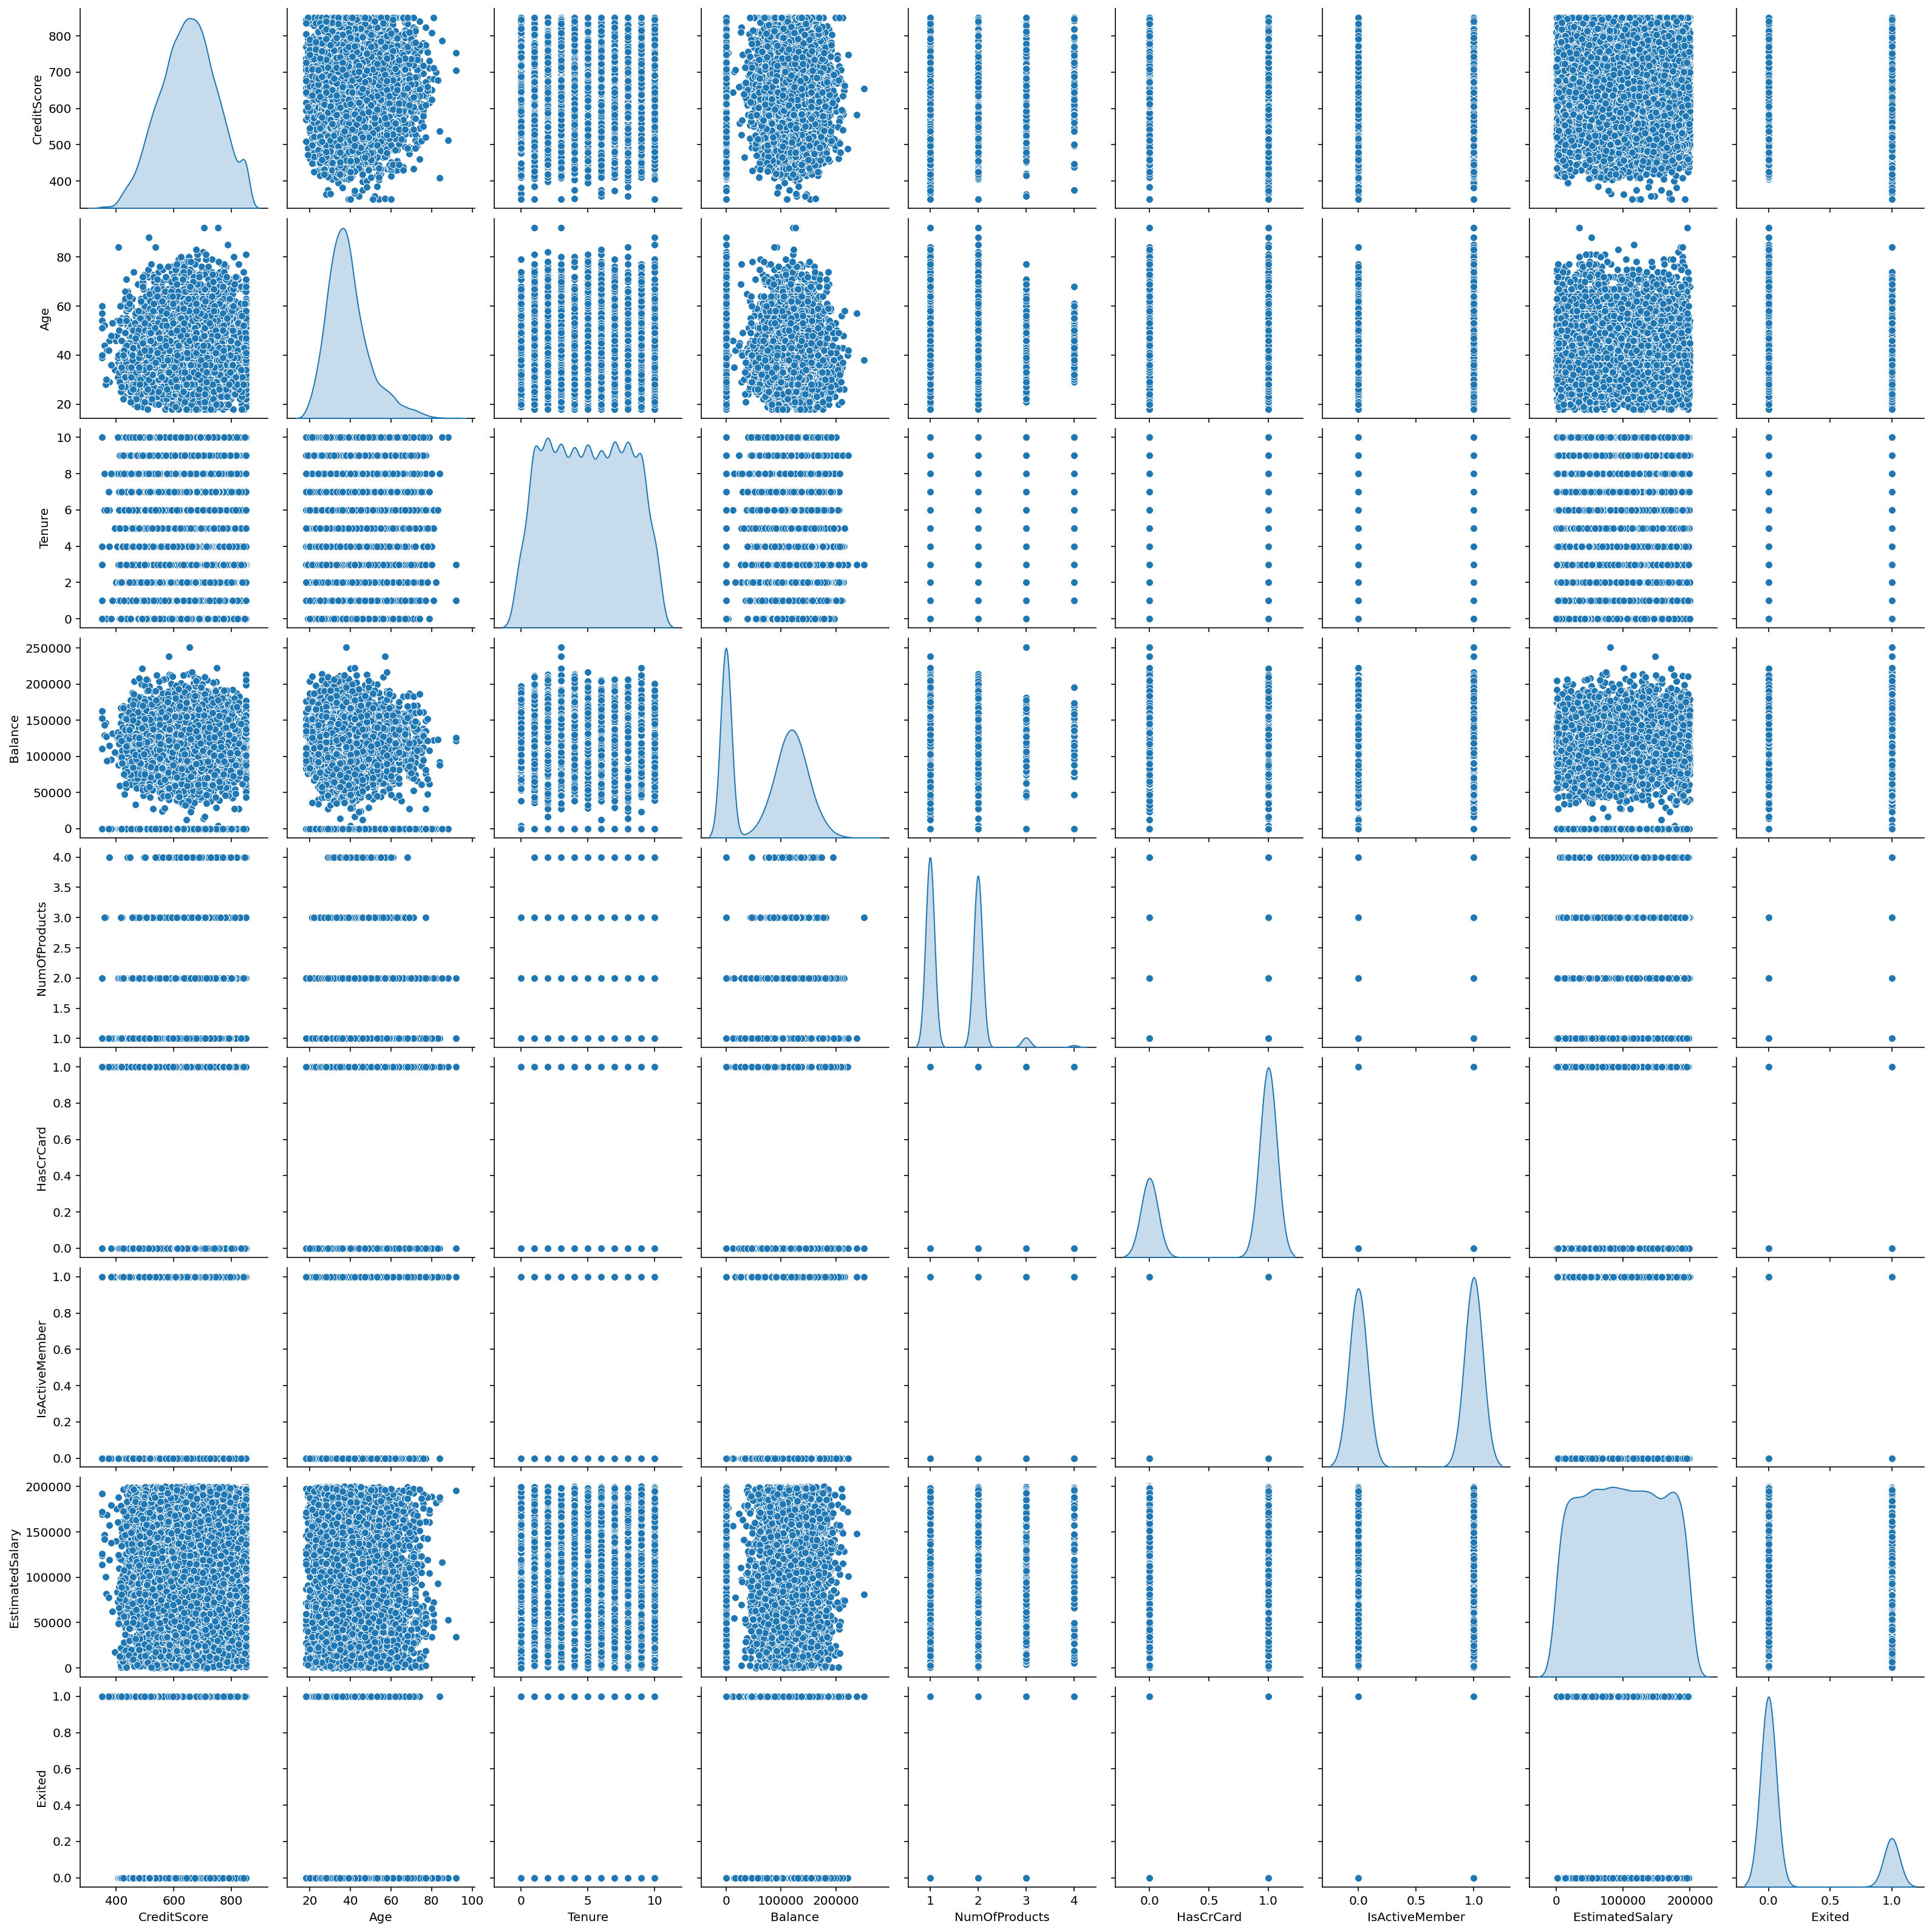

In [15]:
sns.pairplot(df, diag_kind='kde');

<AxesSubplot:>

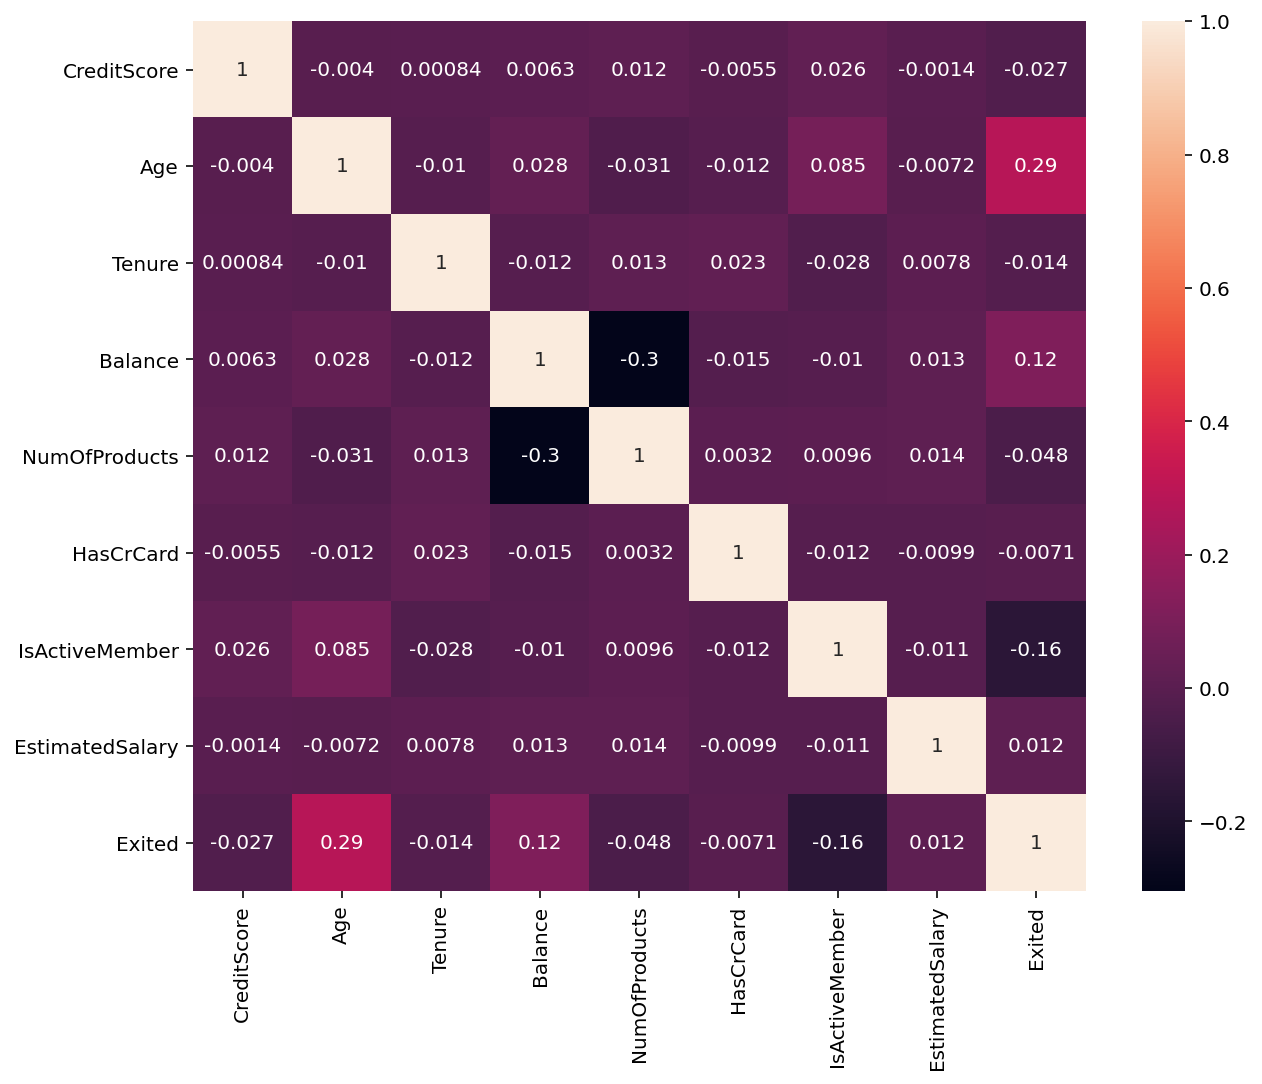

In [16]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot = True)

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
X_data = df.drop('Exited', axis=1)
y_data = df['Exited']

In [19]:
X_data.shape

(10000, 10)

In [20]:
y_data.shape

(10000,)

In [21]:
X_data = pd.get_dummies(X_data, drop_first=True)
X_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 7)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 11)
(3000, 11)
(7000,)
(3000,)


### Normalizing the train and test data

In [24]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [25]:
X_train=tf.convert_to_tensor(X_train)
y_train=tf.convert_to_tensor(y_train)
X_test=tf.convert_to_tensor(X_test)
y_test=tf.convert_to_tensor(y_test)

In [34]:
print(type(X_test))

<class 'tensorflow.python.framework.ops.EagerTensor'>


### Creating the model

In [26]:
model = Sequential()

In [27]:
model.add(Dense(500, input_shape = (11,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [28]:
sgd = optimizers.Adam(lr = 0.001)
model.compile(loss='binary_crossentropy', optimizer= sgd,  metrics=['accuracy'])

In [29]:
model.fit(X_train, y_train, epochs=50, batch_size=500, verbose=1)

Epoch 1/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.5753
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.7904
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.7972
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.8084
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.8146
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8128
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8193
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8227
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8355
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3692 - accuracy: 0.8365
Epoch 11/50
14/14 [

In [30]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.859
Loss: 0.342


In [31]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

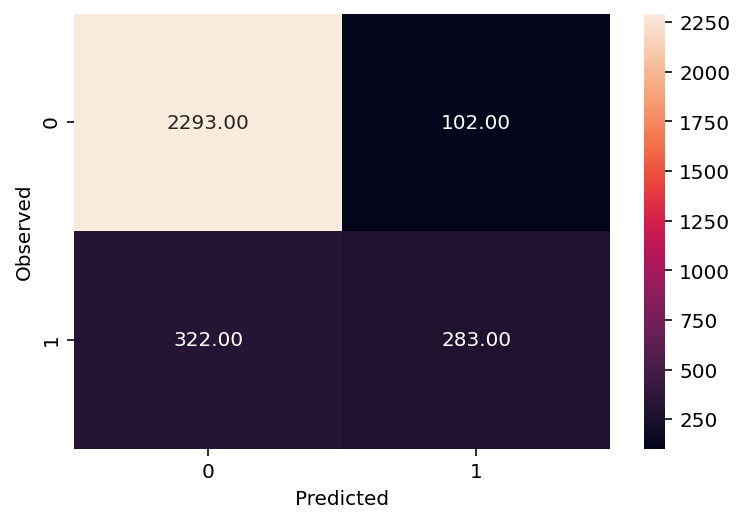

In [32]:
predictions = model.predict_classes(X_test, batch_size=200, verbose=0)
draw_cm(y_test, predictions)

In [33]:
print('Recall Score: ' + str(recall_score(y_test, predictions)))
print('Precision Score: ' + str(precision_score(y_test, predictions)))
print('F1 Score: ' + str(f1_score(y_test, predictions)))

Recall Score: 0.4677685950413223
Precision Score: 0.7350649350649351
F1 Score: 0.5717171717171717


### Conclusion

Looking at the results from our model, we see having our model run at 50 epochs that it finished with 86.7% accuracy and a loss of 31.72%, while the model scored an accuracy of 85.9% and Loss of 43.2% on the test data, which shows that our model is not overfitted.

Furthermore, looking at our confusion matrix we see that we obtained a recall score of 46.78%, precision score of 73.5% and F1 Score of 57.17%

By playing withe the learning rate, epochs, and changing the number of neurons in each layer, as well as adding or removing layers will affect the models performance. Having played around with these parameters, I landed on these final parameters as they seemd to optimize the accuracy while requiring lower computational recources than could be used with minimal gains.